# Вальчевський Павло, ОІ-21сп, Варіант 2, ПР № 3

##### Переклад назви характеристик даних (для розуміння з якими даними буду працювати):
1)	Region - Регіон
2)	Island - Острів
3)	Stage - Стадія
4)	Individual ID - Ідентифікаційний номер
5)	Clutch Completion - Завершення кладки
6)	Date Egg - Дата яйця
7)	Culmen Length (mm) - Довжина дзьоба (мм)
8)	Culmen Depth (mm) - Глибина дзьоба (мм)
9)	Flipper Length (mm) - Довжина плавця (мм)
10)	Body Mass (g) - Маса тіла (г)
11)	Sex - Стать
12)	Delta 15 N (o/oo) - Дельта 15 N (о/оо)
13)	Delta 13 C (o/oo) - Дельта 13 C (о/оо)
14)	Comment - Коментар
15)	Species - Вид пінгвінів у регіоні


In [2]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Зчитування даних, які не мають пустих значень
ds = pd.read_csv("./variant_2_new.csv")

## Дані були оброблені (заповненні за модою, медіаною, для категоріальних - відповідним значенням, який вказує на пропущеність) у ПР № 2 і було видалено безіменний стовпець та створено новий файл з даними, які повністю заповнені
## Кодування категоріальних стовпців

In [4]:
# Категоріальні стовпці
cat_columns = ['Date Egg', 'Clutch Completion', 'studyName', 'Region', 'Island', 'Stage', 'Individual ID', 'Sex', 'Species', 'Comments']

# Кодування категоріальних стовпців
map_dicts = dict()
for column in cat_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes

# Вивід результату
display(ds.sample(15))
# Вивід інформації про стовпці
ds.info()

,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
1,0,1,0,2,0,21,1,3,39.500000,17.400000,186.000000,3800.000000,0,8.949560,-24.69454,0,0
252,0,252,0,0,0,97,1,49,45.100000,14.500000,207.000000,5050.000000,1,10.366304,-25.53768,0,2
406,0,406,0,1,0,134,1,33,45.448925,17.868270,191.914022,3512.768683,0,9.321050,-24.86594,0,1
244,0,244,0,0,0,74,1,37,42.900000,13.100000,215.000000,5000.000000,0,7.685280,-25.39181,0,2
347,0,347,0,1,0,108,1,29,48.834530,18.258367,193.861224,3594.306119,0,9.754860,-24.80500,0,1
116,2,116,0,2,0,109,1,20,38.600000,17.000000,188.000000,2900.000000,1,9.180210,-25.77264,0,0
151,2,151,0,1,0,155,1,18,41.500000,18.500000,201.000000,4000.000000,1,8.896400,-26.06967,0,0
20,0,20,0,0,0,3,1,5,37.800000,18.300000,174.000000,3400.000000,0,8.799865,-25.09383,0,0
201,2,201,0,1,0,161,1,29,49.800000,17.300000,198.000000,3675.000000,0,9.321690,-24.41562,0,1
233,0,233,0,0,0,59,1,37,48.400000,14.600000,213.000000,5850.000000,1,7.820800,-25.48025,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            456 non-null    int8   
 1   Sample Number        456 non-null    int64  
 2   Region               456 non-null    int8   
 3   Island               456 non-null    int8   
 4   Stage                456 non-null    int8   
 5   Individual ID        456 non-null    int16  
 6   Clutch Completion    456 non-null    int8   
 7   Date Egg             456 non-null    int8   
 8   Culmen Length (mm)   456 non-null    float64
 9   Culmen Depth (mm)    456 non-null    float64
 10  Flipper Length (mm)  456 non-null    float64
 11  Body Mass (g)        456 non-null    float64
 12  Sex                  456 non-null    int8   
 13  Delta 15 N (o/oo)    456 non-null    float64
 14  Delta 13 C (o/oo)    456 non-null    float64
 15  Comments             456 non-null    int

## Моделювання
### Класифікація

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

# Визначення цільової змінної
y_column = ['Species']  # Вид пінгвіна

# Визначення ознак
X_columns = ['Date Egg', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Region', 'Island', 'Stage']

X = ds[X_columns] # Ознаки
y = ds[y_column] # Цільова змінна

# Перевірка
print(X.head())
print(y.head())

   Date Egg  Clutch Completion  Culmen Length (mm)  Culmen Depth (mm)  \
0         3                  1                39.1               18.7   
1         3                  1                39.5               17.4   
2        15                  1                40.3               18.0   
3        15                  1                41.1               17.0   
4        15                  1                36.7               19.3   

   Flipper Length (mm)  Body Mass (g)  Sex  Region  Island  Stage  
0                181.0         3750.0    1       0       2      0  
1                186.0         3800.0    0       0       2      0  
2                195.0         3250.0    0       0       1      0  
3                190.0         3800.0    1       0       1      0  
4                193.0         3450.0    0       0       2      0  
   Species
0        0
1        0
2        0
3        0
4        0


### Тренувальні та тестові набори, моделі і валідація моделей

In [8]:
# Фукнція оцінки важливості ознак з виводом графіку
def print_plot_feature_importances(classifier, X_train, X_columns, title=str):
    # Оцінка важливості ознак
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
    elif hasattr(classifier, 'coef_'): # Для моделей, які використовують логістичну регресію
        importances = np.abs(classifier.coef_[0])
    else:
        print('Цей метод не дає оцінку важливості ознак')
        return
    indices = np.argsort(importances)[::-1]
    # Виведення рейтингу ознак
    print('Рейтинг ознак для ' + title + ':')
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X_columns[indices[f]]} ({importances[indices[f]]:.6f})")
    # Побудова графіку
    plt.figure(figsize=(7, 12))
    plt.title('Важливість ознак для ' + title + ':')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
    plt.xlabel('Відносна важливість')
    plt.show()

# Фукнція виводу матриці плутанини і оцінка ефективності моделей
def print_plot_accuracy_confusion_matrix(y_test, y_pred, title=str):
    # Точність
        # marco - середнє значення для кожного класу
        # zero_division - якщо ділення на нуль (немає позитивного прогнозу) повертає 1
    print('Оцінка ефективності для ' + title + ':')
    print('Accuracy (точність правильних прогнозів):', metrics.accuracy_score(y_test, y_pred))
    print('Precision (частка позитивних прогнозів):', metrics.precision_score(y_test, y_pred, average='macro', zero_division=1))
    print('Recall (частка позитивних прогнозів, що були правильно виявлені):', metrics.recall_score(y_test, y_pred, average='macro', zero_division=1))
    print('F1 Score (гармонійне середнє між Precision і Recall):', metrics.f1_score(y_test, y_pred, average='macro', zero_division=1))
    print('Матриця плутанини (confusion matrix) для ' + title + ':')
    # Матриця плутанини
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    disp = ConfusionMatrixDisplay(conf_matrix)
    disp.plot()

In [9]:
# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логістична регресія (LogisticRegression):
               precision    recall  f1-score   support

           0       0.99      0.83      0.90        82
           1       0.95      0.97      0.96        76
           2       0.85      0.99      0.91        70

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.92       228

Рейтинг ознак для LogisticRegression з параметрами за замовчуванням:
1. Culmen Length (mm) (0.611004)
2. Culmen Depth (mm) (0.243283)
3. Flipper Length (mm) (0.142489)
4. Date Egg (0.034147)
5. Sex (0.029390)
6. Island (0.023423)
7. Clutch Completion (0.010584)
8. Body Mass (g) (0.000934)
9. Stage (0.000000)
10. Region (0.000000)


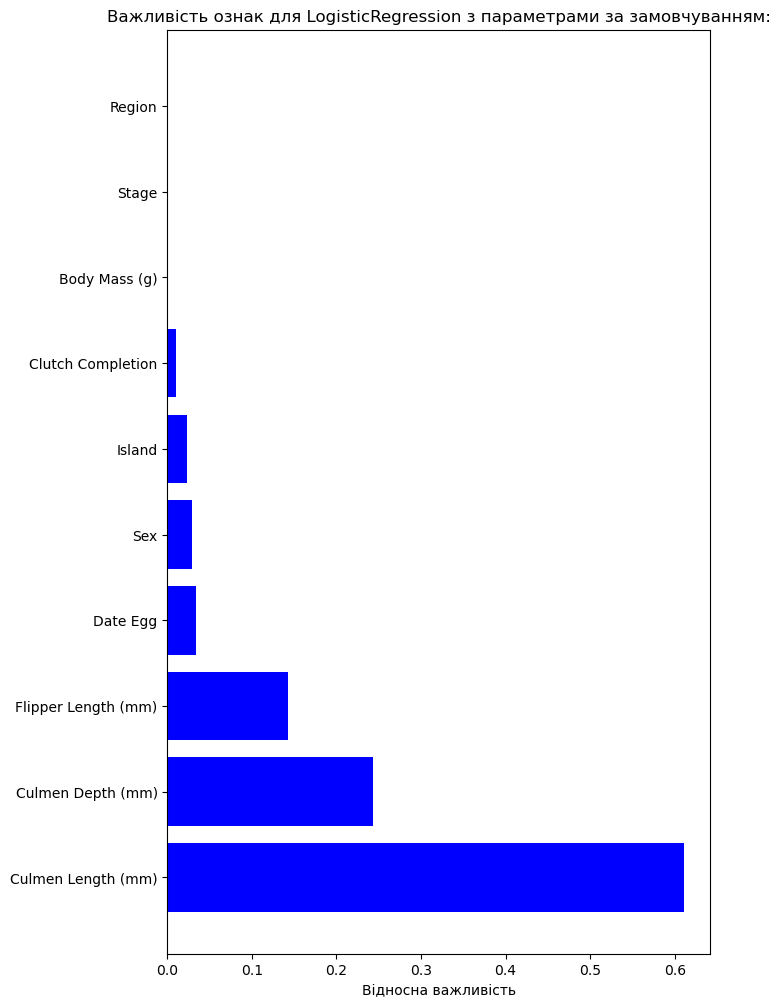

Оцінка ефективності для LogisticRegression:
Accuracy (точність правильних прогнозів): 0.9254385964912281
Precision (частка позитивних прогнозів): 0.9286923489822042
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9295555963078428
F1 Score (гармонійне середнє між Precision і Recall): 0.9252028324876007
Матриця плутанини (confusion matrix) для LogisticRegression:
[[68  4 10]
 [ 0 74  2]
 [ 1  0 69]]


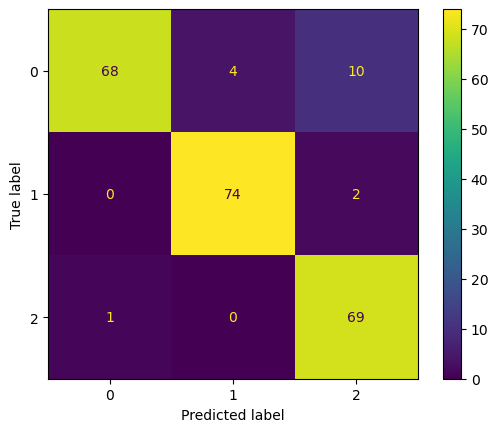

In [10]:
# Логістична регресія (LogisticRegression) з параметрами за замовчуванням
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print("Логістична регресія (LogisticRegression):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(reg_log, X_train, X_columns, 'LogisticRegression з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'LogisticRegression')

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Баєсова класифікація (GaussianNB):
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.94      1.00      0.97        76
           2       1.00      0.99      0.99        70

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

Цей метод не дає оцінку важливості ознак
Оцінка ефективності для GaussianNB:
Accuracy (точність правильних прогнозів): 0.9780701754385965
Precision (частка позитивних прогнозів): 0.9794238683127571
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9789779326364693
F1 Score (гармонійне середнє між Precision і Recall): 0.9786528738792405
Матриця плутанини (confusion matrix) для GaussianNB:
[[78  4  0]
 [ 0 76  0]
 [ 0  1 69]]


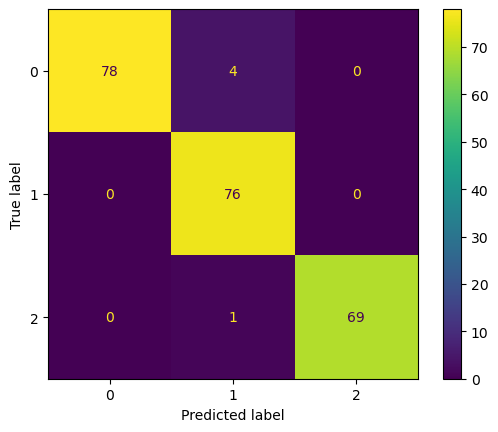

In [11]:
# Баєсова класифікація (GaussianNB) з параметрами за замовчуванням
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print("Баєсова класифікація (GaussianNB):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(gnb_classifier, X_train, X_columns, 'GaussianNB з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'GaussianNB')

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Метод опорних векторів (SVC):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        82
           1       0.47      0.91      0.62        76
           2       0.79      0.93      0.86        70

    accuracy                           0.59       228
   macro avg       0.76      0.61      0.49       228
weighted avg       0.76      0.59      0.47       228

Цей метод не дає оцінку важливості ознак
Оцінка ефективності для SVC:
Accuracy (точність правильних прогнозів): 0.5877192982456141
Precision (частка позитивних прогнозів): 0.7550952221850986
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.612155388471178
F1 Score (гармонійне середнє між Precision і Recall): 0.4922949265054528
Матриця плутанини (confusion matrix) для SVC:
[[ 0 72 10]
 [ 0 69  7]
 [ 0  5 65]]


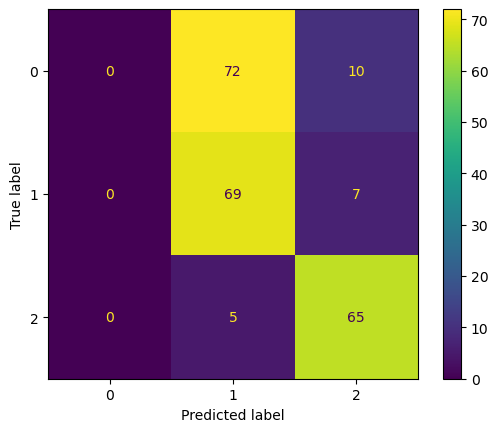

In [12]:
# Метод опорних векторів (SVC) з параметрами за замовчуванням
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print("Метод опорних векторів (SVC):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(svc_classifier, X_train, X_columns, 'SVC з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'SVC')

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Стохастичний градієнт (SGDClassifier):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        82
           1       0.33      1.00      0.50        76
           2       1.00      0.00      0.00        70

    accuracy                           0.33       228
   macro avg       0.78      0.33      0.17       228
weighted avg       0.78      0.33      0.17       228

Рейтинг ознак для SGDClassifier з параметрами за замовчуванням:
1. Flipper Length (mm) (33229.957930)
2. Date Egg (16208.710153)
3. Culmen Depth (mm) (8369.898548)
4. Culmen Length (mm) (4051.697113)
5. Body Mass (g) (3774.677906)
6. Island (955.038163)
7. Clutch Completion (304.021551)
8. Sex (264.896415)
9. Stage (0.000000)
10. Region (0.000000)


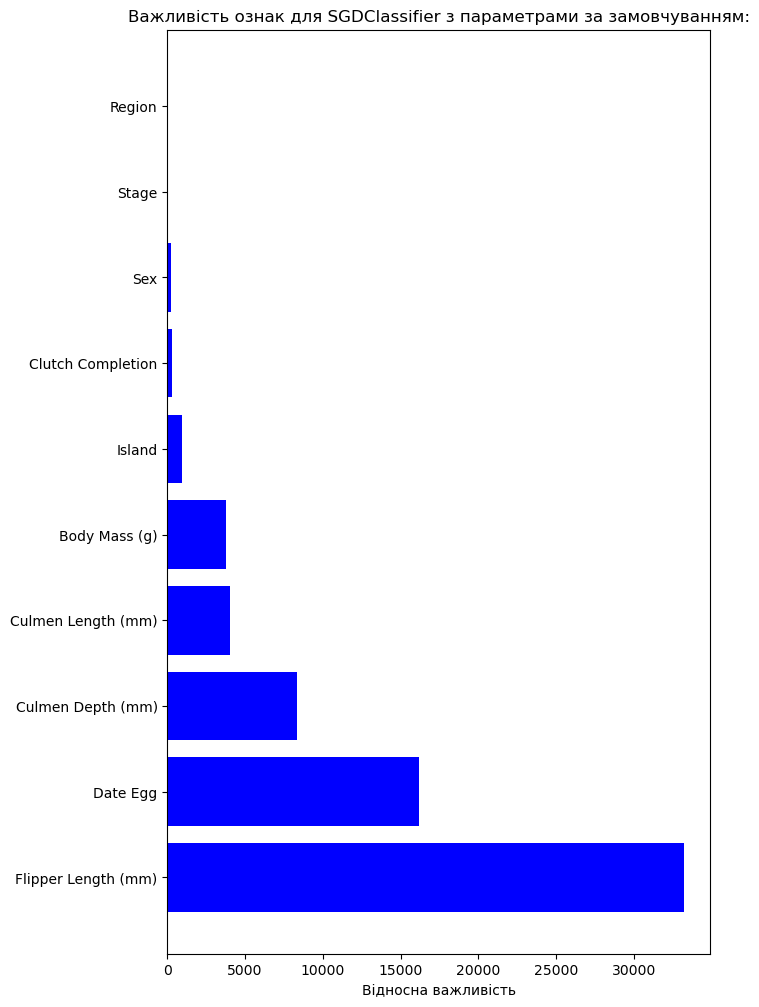

Оцінка ефективності для SGDClassifier:
Accuracy (точність правильних прогнозів): 0.3333333333333333
Precision (частка позитивних прогнозів): 0.7777777777777777
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.3333333333333333
F1 Score (гармонійне середнє між Precision і Recall): 0.16666666666666666
Матриця плутанини (confusion matrix) для SGDClassifier:
[[ 0 82  0]
 [ 0 76  0]
 [ 0 70  0]]


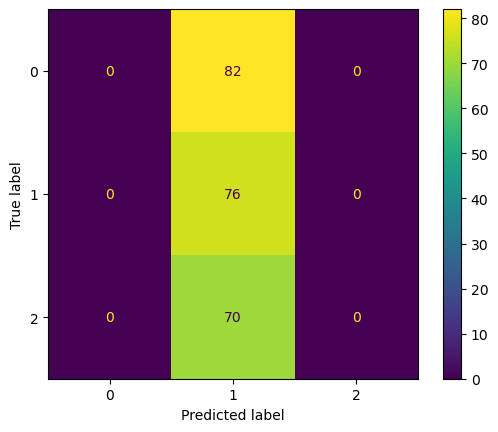

In [13]:
# Стохастичний градієнт (SGDClassifier) з параметрами за замовчуванням
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print("Стохастичний градієнт (SGDClassifier):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(sgd_classifier, X_train, X_columns, 'SGDClassifier з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'SGDClassifier')

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Найближчі сусіди (KNeighborsClassifier):
               precision    recall  f1-score   support

           0       0.65      0.43      0.51        82
           1       0.57      0.72      0.64        76
           2       0.83      0.93      0.88        70

    accuracy                           0.68       228
   macro avg       0.68      0.69      0.68       228
weighted avg       0.68      0.68      0.67       228

Цей метод не дає оцінку важливості ознак
Оцінка ефективності для KNeighborsClassifier:
Accuracy (точність правильних прогнозів): 0.6798245614035088
Precision (частка позитивних прогнозів): 0.6847993827160495
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.6930283024634759
F1 Score (гармонійне середнє між Precision і Recall): 0.6775397148174166
Матриця плутанини (confusion matrix) для KNeighborsClassifier:
[[35 38  9]
 [17 55  4]
 [ 2  3 65]]


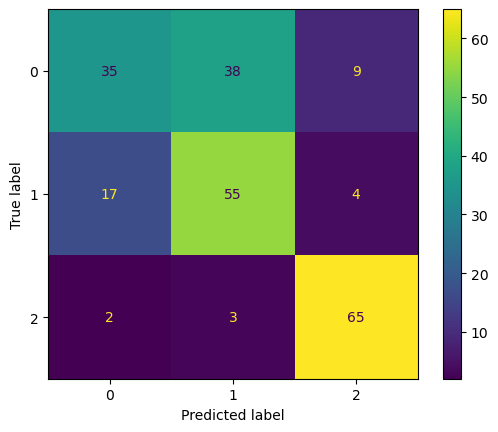

In [14]:
# Найближчі сусіди (KNeighborsClassifier) з параметрами за замовчуванням
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print("Найближчі сусіди (KNeighborsClassifier):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(kn_classifier, X_train, X_columns, 'KNeighborsClassifier з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'KNeighborsClassifier')

Дерево рішень (DecisionTreeClassifier):
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        82
           1       0.94      0.97      0.95        76
           2       1.00      1.00      1.00        70

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

Рейтинг ознак для DecisionTreeClassifier з параметрами за замовчуванням:
1. Flipper Length (mm) (0.462245)
2. Culmen Length (mm) (0.437968)
3. Culmen Depth (mm) (0.044236)
4. Island (0.028257)
5. Date Egg (0.027295)
6. Stage (0.000000)
7. Region (0.000000)
8. Sex (0.000000)
9. Body Mass (g) (0.000000)
10. Clutch Completion (0.000000)


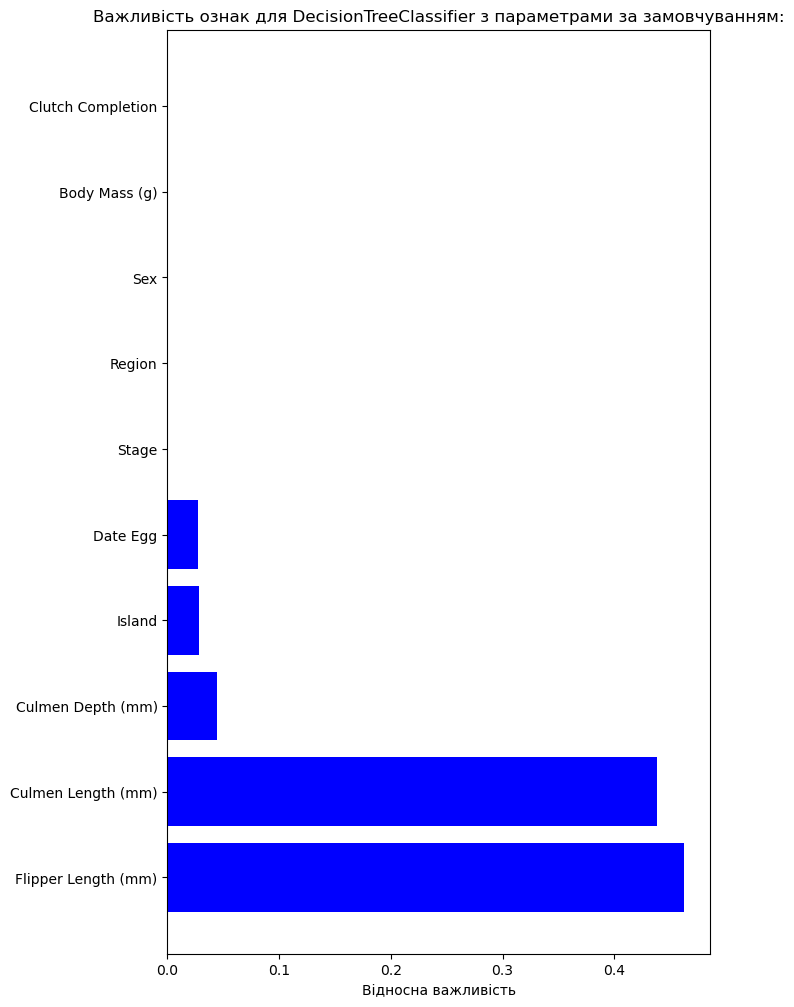

Оцінка ефективності для DecisionTreeClassifier:
Accuracy (точність правильних прогнозів): 0.9692982456140351
Precision (частка позитивних прогнозів): 0.9704641350210971
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9709028669234061
F1 Score (гармонійне середнє між Precision і Recall): 0.9704534829359514
Матриця плутанини (confusion matrix) для DecisionTreeClassifier:
[[77  5  0]
 [ 2 74  0]
 [ 0  0 70]]


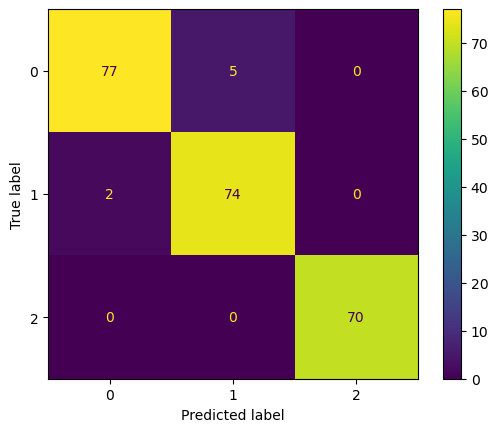

In [15]:
# Дерево рішень (DecisionTreeClassifier) з параметрами за замовчуванням
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print("Дерево рішень (DecisionTreeClassifier):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(dt_classifier, X_train, X_columns, 'DecisionTreeClassifier з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'DecisionTreeClassifier')

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Випадковоий ліс (RandomForestClassifier):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       0.97      1.00      0.99        76
           2       1.00      1.00      1.00        70

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228

Рейтинг ознак для RandomForestClassifier з параметрами за замовчуванням:
1. Culmen Length (mm) (0.292900)
2. Flipper Length (mm) (0.220933)
3. Culmen Depth (mm) (0.192719)
4. Date Egg (0.115440)
5. Island (0.088947)
6. Body Mass (g) (0.080584)
7. Sex (0.005119)
8. Clutch Completion (0.003358)
9. Stage (0.000000)
10. Region (0.000000)


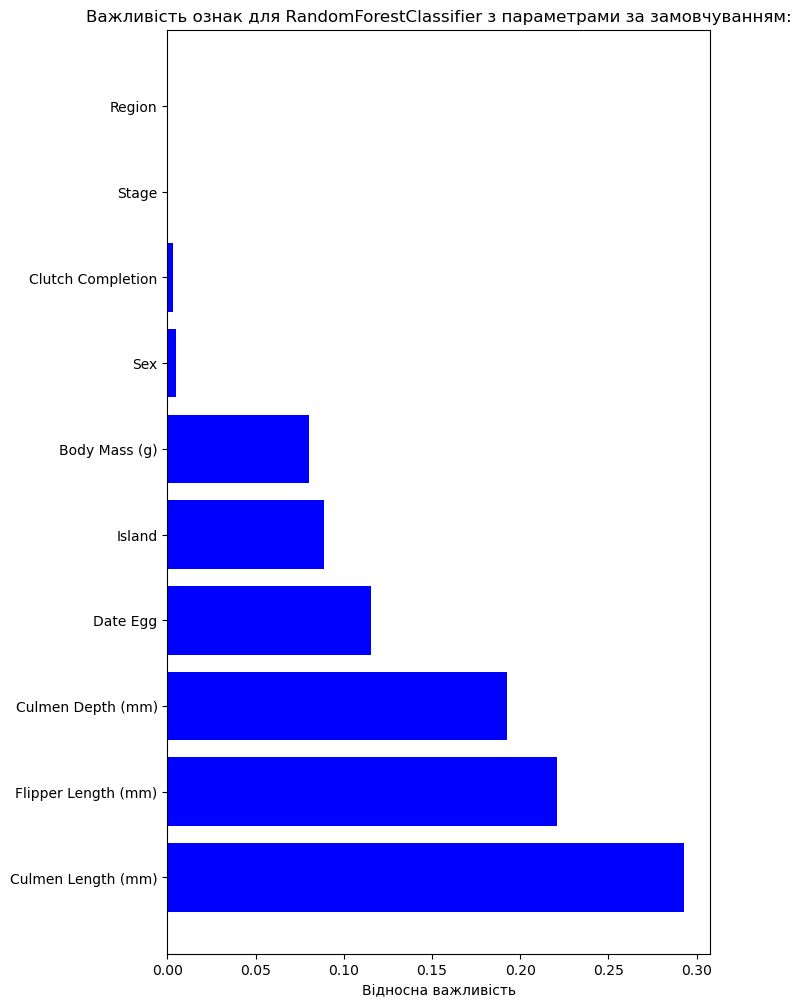

Оцінка ефективності для RandomForestClassifier:
Accuracy (точність правильних прогнозів): 0.9912280701754386
Precision (частка позитивних прогнозів): 0.9914529914529915
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.991869918699187
F1 Score (гармонійне середнє між Precision і Recall): 0.991555769333547
Матриця плутанини (confusion matrix) для RandomForestClassifier:
[[80  2  0]
 [ 0 76  0]
 [ 0  0 70]]


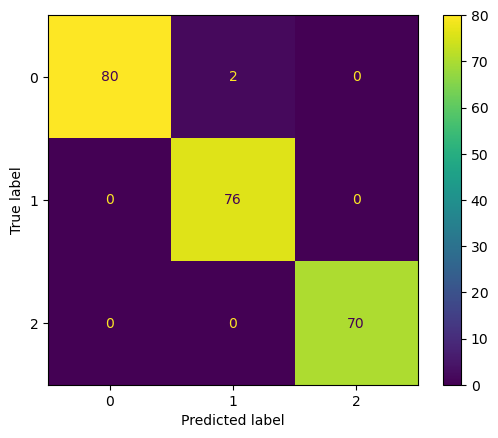

In [16]:
# Випадковоий ліс (RandomForestClassifier) з параметрами за замовчуванням
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Випадковоий ліс (RandomForestClassifier):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(rf_classifier, X_train, X_columns, 'RandomForestClassifier з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'RandomForestClassifier')

C:\Users\lajft\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Градієнтний спуск (GradientBoostingClassifier):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        82
           1       0.94      1.00      0.97        76
           2       1.00      1.00      1.00        70

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

Рейтинг ознак для GradientBoostingClassifier з параметрами за замовчуванням:
1. Culmen Length (mm) (0.431819)
2. Flipper Length (mm) (0.333229)
3. Island (0.132861)
4. Culmen Depth (mm) (0.072634)
5. Date Egg (0.028217)
6. Body Mass (g) (0.001191)
7. Sex (0.000033)
8. Clutch Completion (0.000017)
9. Stage (0.000000)
10. Region (0.000000)


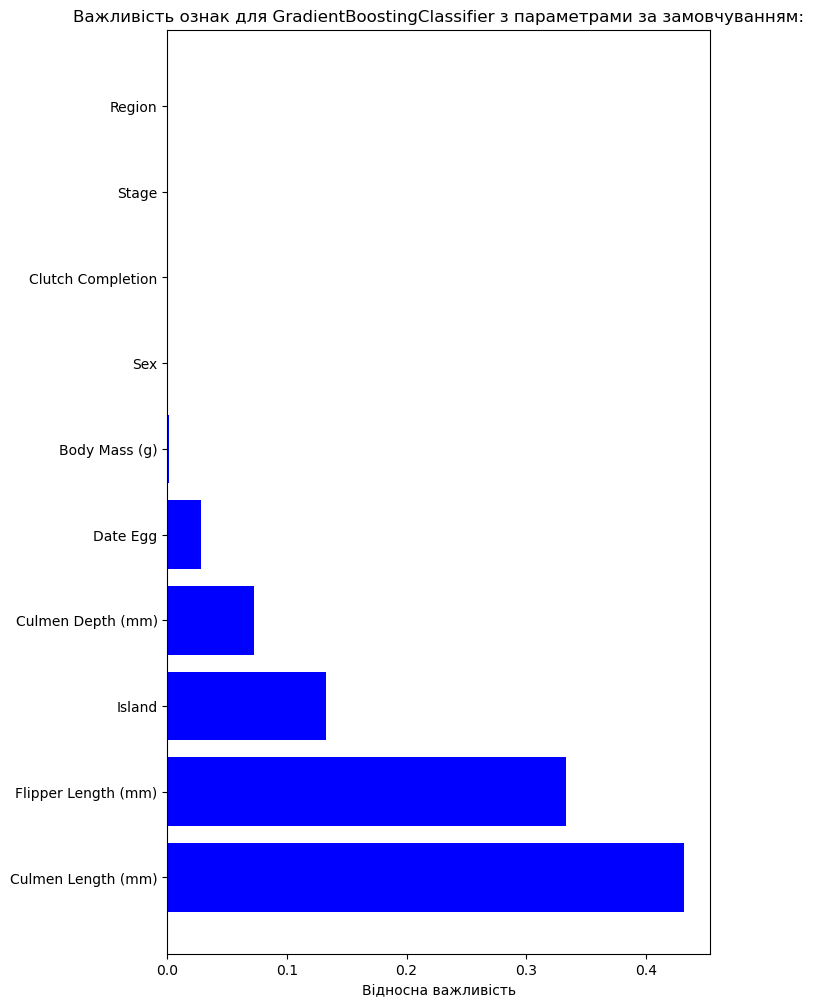

Оцінка ефективності для GradientBoostingClassifier:
Accuracy (точність правильних прогнозів): 0.9780701754385965
Precision (частка позитивних прогнозів): 0.9794238683127571
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9796747967479674
F1 Score (гармонійне середнє між Precision і Recall): 0.9789021084538451
Матриця плутанини (confusion matrix) для GradientBoostingClassifier:
[[77  5  0]
 [ 0 76  0]
 [ 0  0 70]]


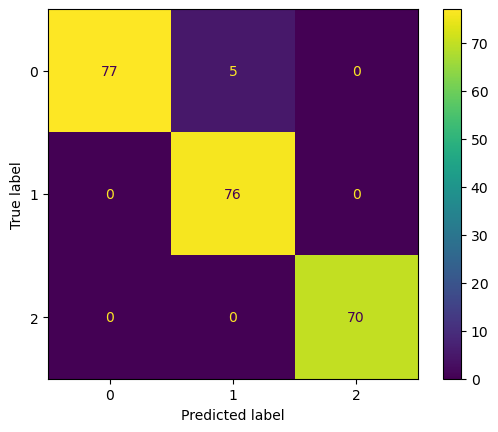

In [17]:
# Градієнтний спуск з параметрами за замовчуванням
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print("Градієнтний спуск (GradientBoostingClassifier):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(gb_classifier, X_train, X_columns, 'GradientBoostingClassifier з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'GradientBoostingClassifier')

Логістична регресія (LogisticRegression) з параметрами:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.99      1.00      0.99        76
           2       1.00      1.00      1.00        70

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

Рейтинг ознак для LogisticRegression з параметрами:
1. Culmen Length (mm) (1.047651)
2. Culmen Depth (mm) (0.956434)
3. Island (0.329423)
4. Clutch Completion (0.245448)
5. Sex (0.139382)
6. Date Egg (0.099908)
7. Flipper Length (mm) (0.004939)
8. Body Mass (g) (0.001869)
9. Stage (0.000000)
10. Region (0.000000)


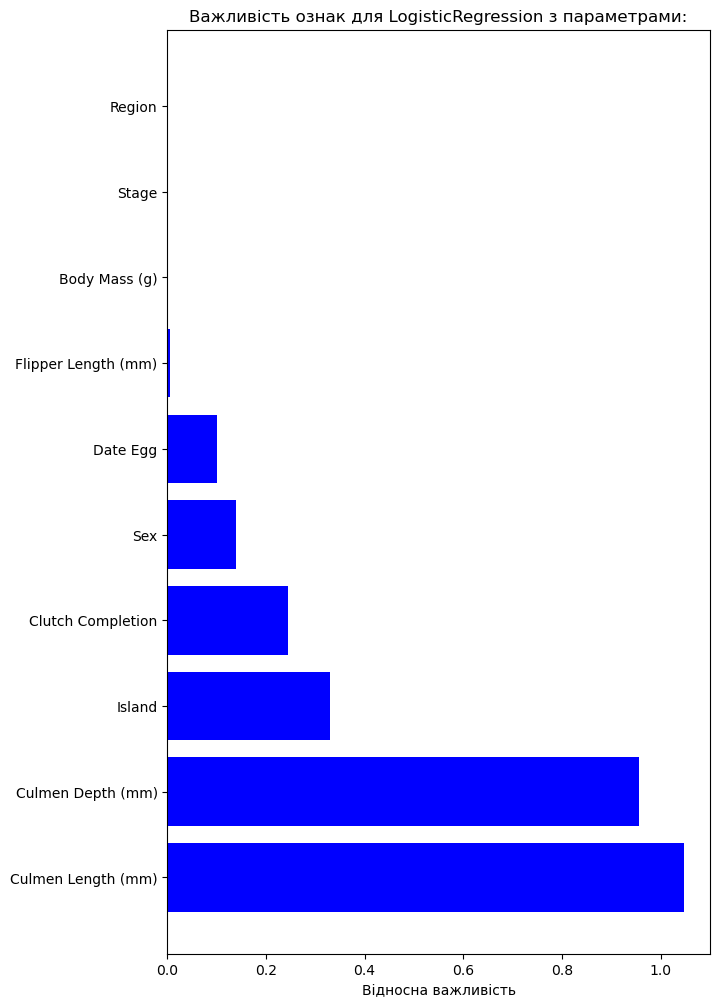

Оцінка ефективності для LogisticRegression:
Accuracy (точність правильних прогнозів): 0.9956140350877193
Precision (частка позитивних прогнозів): 0.9956709956709956
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9959349593495935
F1 Score (гармонійне середнє між Precision і Recall): 0.9957763609874761
Матриця плутанини (confusion matrix) для LogisticRegression:
[[81  1  0]
 [ 0 76  0]
 [ 0  0 70]]


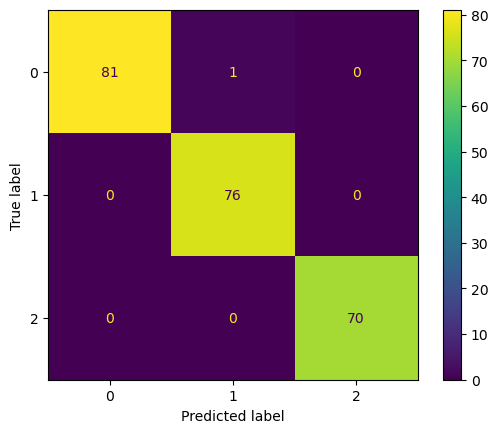

In [18]:
# Логістична регресія (LogisticRegression) з параметрами
reg_log = LogisticRegression(max_iter=100000, solver='lbfgs')  # Збільшення кількості ітерацій та долучення методу оптимізації
reg_log.fit(X_train, np.ravel(y_train.values))  # Використовую np.ravel() для перетворення y в одномірний масив
y_pred = reg_log.predict(X_test)
print("Логістична регресія (LogisticRegression) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(reg_log, X_train, X_columns, 'LogisticRegression з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'LogisticRegression')

Баєсова класифікація (GaussianNB) з параметрами:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.94      1.00      0.97        76
           2       1.00      0.99      0.99        70

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

Цей метод не дає оцінку важливості ознак
Оцінка ефективності для GaussianNB:
Accuracy (точність правильних прогнозів): 0.9780701754385965
Precision (частка позитивних прогнозів): 0.9794238683127571
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9789779326364693
F1 Score (гармонійне середнє між Precision і Recall): 0.9786528738792405
Матриця плутанини (confusion matrix) для GaussianNB:
[[78  4  0]
 [ 0 76  0]
 [ 0  1 69]]


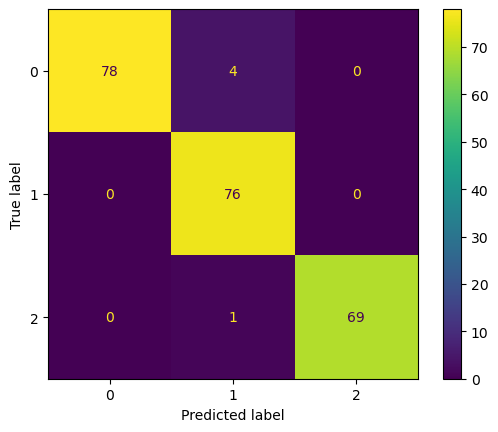

In [19]:
# Баєсова класифікація (GaussianNB) з параметрами
gnb_classifier = GaussianNB(var_smoothing=1e-9)  # Збільшення дисперсії для подальшого обчислання ймовірності
gnb_classifier.fit(X_train, np.ravel(y_train.values))  # Використовую np.ravel() для перетворення y в одномірний масив
y_pred = gnb_classifier.predict(X_test)

print("Баєсова класифікація (GaussianNB) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(gnb_classifier, X_train, X_columns, 'GaussianNB з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'GaussianNB')

Метод опорних векторів (SVC) з параметрами:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        82
           1       0.47      0.91      0.62        76
           2       0.79      0.93      0.86        70

    accuracy                           0.59       228
   macro avg       0.76      0.61      0.49       228
weighted avg       0.76      0.59      0.47       228

Цей метод не дає оцінку важливості ознак
Оцінка ефективності для SVC:
Accuracy (точність правильних прогнозів): 0.5877192982456141
Precision (частка позитивних прогнозів): 0.7550952221850986
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.612155388471178
F1 Score (гармонійне середнє між Precision і Recall): 0.4922949265054528
Матриця плутанини (confusion matrix) для SVC:
[[ 0 72 10]
 [ 0 69  7]
 [ 0  5 65]]


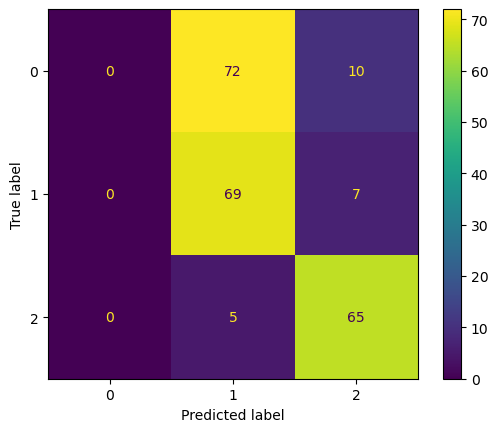

In [20]:
# Метод опорних векторів (SVC) з параметрами
# Параметри: 
    # регуляризації (модель підлаштовується до даних краще) 
    # тип ядра (для перетоворення даних - радіальна базисна функція)
    # гама (вплив інших даних на стандартні)
    # випадковий стан (початкове значення для рандому)
svc_classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svc_classifier.fit(X_train, y_train.values.ravel())
y_pred = svc_classifier.predict(X_test)
print("Метод опорних векторів (SVC) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(svc_classifier, X_train, X_columns, 'SVC з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'SVC')

Стохастичний градієнт (SGDClassifier) з параметрами:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        82
           1       0.57      0.87      0.69        76
           2       0.58      0.94      0.72        70

    accuracy                           0.58       228
   macro avg       0.72      0.60      0.47       228
weighted avg       0.73      0.58      0.45       228

Рейтинг ознак для SGDClassifier з параметрами:
1. Flipper Length (mm) (34429.934313)
2. Date Egg (15838.668374)
3. Culmen Depth (mm) (8401.998074)
4. Culmen Length (mm) (3838.467478)
5. Body Mass (g) (3087.638232)
6. Island (962.014511)
7. Clutch Completion (297.908664)
8. Sex (224.498506)
9. Stage (0.000000)
10. Region (0.000000)


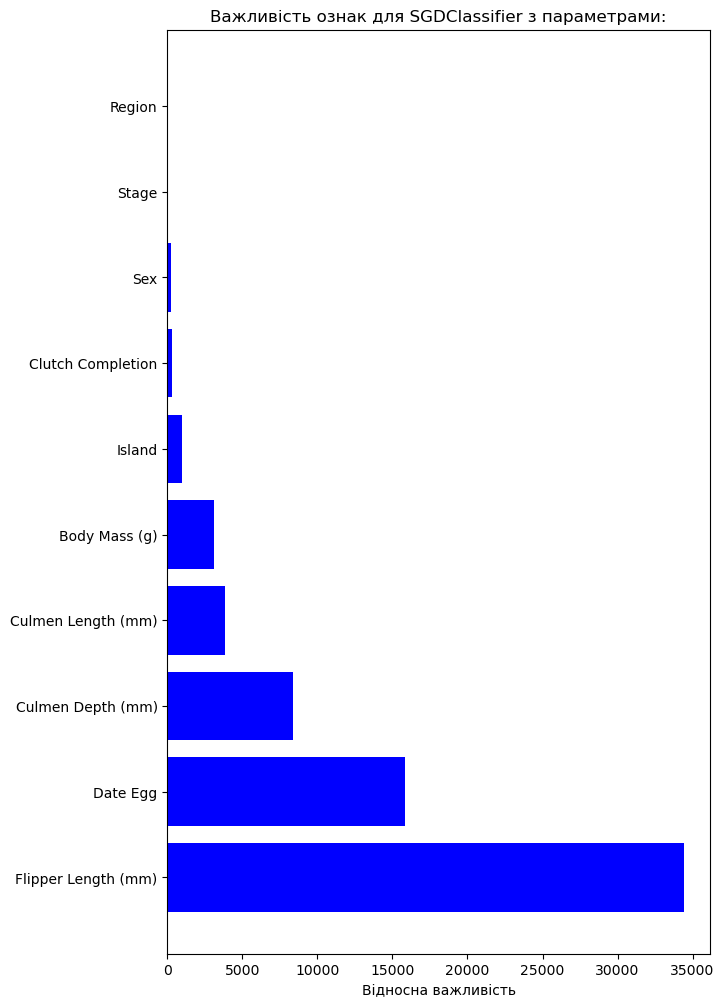

Оцінка ефективності для SGDClassifier:
Accuracy (точність правильних прогнозів): 0.5789473684210527
Precision (частка позитивних прогнозів): 0.7193279466461459
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.6037593984962406
F1 Score (гармонійне середнє між Precision і Recall): 0.4708036506165422
Матриця плутанини (confusion matrix) для SGDClassifier:
[[ 0 45 37]
 [ 0 66 10]
 [ 0  4 66]]


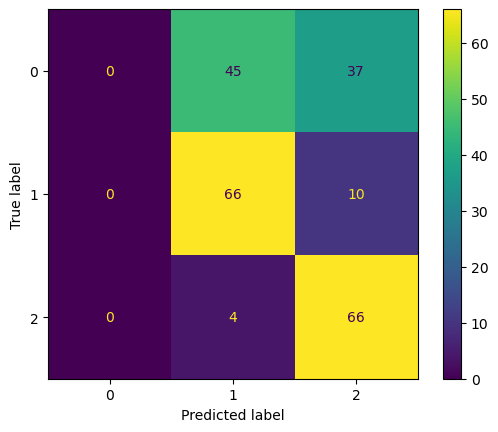

In [21]:
# Стохастичний градієнт (SGDClassifier) з параметрами
# Параметри:
    # Вибір функції втрат (hinge - для SVM)
    # Кількість ітерацій
    # Похибка для зупинення
    # Випадковий стан (початкове значення для рандому)
sgd_classifier = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)  
sgd_classifier.fit(X_train, y_train.values.ravel())
y_pred = sgd_classifier.predict(X_test)
print("Стохастичний градієнт (SGDClassifier) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1)) 
print_plot_feature_importances(sgd_classifier, X_train, X_columns, 'SGDClassifier з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'SGDClassifier')

Найближчі сусіди (KNeighborsClassifier) з параметрами:
               precision    recall  f1-score   support

           0       0.80      0.55      0.65        82
           1       0.67      0.80      0.73        76
           2       0.81      0.94      0.87        70

    accuracy                           0.75       228
   macro avg       0.76      0.76      0.75       228
weighted avg       0.76      0.75      0.75       228

Цей метод не дає оцінку важливості ознак
Оцінка ефективності для KNeighborsClassifier:
Accuracy (точність правильних прогнозів): 0.7543859649122807
Precision (частка позитивних прогнозів): 0.7629053045719713
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.7647564032031298
F1 Score (гармонійне середнє між Precision і Recall): 0.7522950068765435
Матриця плутанини (confusion matrix) для KNeighborsClassifier:
[[45 27 10]
 [10 61  5]
 [ 1  3 66]]


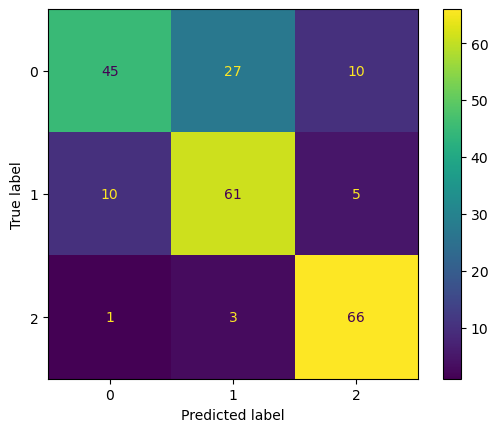

In [22]:
# Найближчі сусіди (KNeighborsClassifier) з параметрами
# Параметри:
    # Кількість сусідів
    # Використовуємо відстань для визначення
    # Розраховуємо за евклідовою формулою відстань 
    # Вибір алгоритму автоматичний

kn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean', algorithm='auto' )
kn_classifier.fit(X_train, y_train.values.ravel())
y_pred = kn_classifier.predict(X_test)
print("Найближчі сусіди (KNeighborsClassifier) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(kn_classifier, X_train, X_columns, 'KNeighborsClassifier з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'KNeighborsClassifier')

Дерево рішень (DecisionTreeClassifier) з параметрами:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        82
           1       0.88      0.91      0.90        76
           2       1.00      0.94      0.97        70

    accuracy                           0.92       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.92      0.92      0.92       228

Рейтинг ознак для DecisionTreeClassifier з параметрами:
1. Flipper Length (mm) (0.513849)
2. Culmen Length (mm) (0.440559)
3. Culmen Depth (mm) (0.025200)
4. Date Egg (0.017720)
5. Clutch Completion (0.002673)
6. Stage (0.000000)
7. Island (0.000000)
8. Region (0.000000)
9. Sex (0.000000)
10. Body Mass (g) (0.000000)


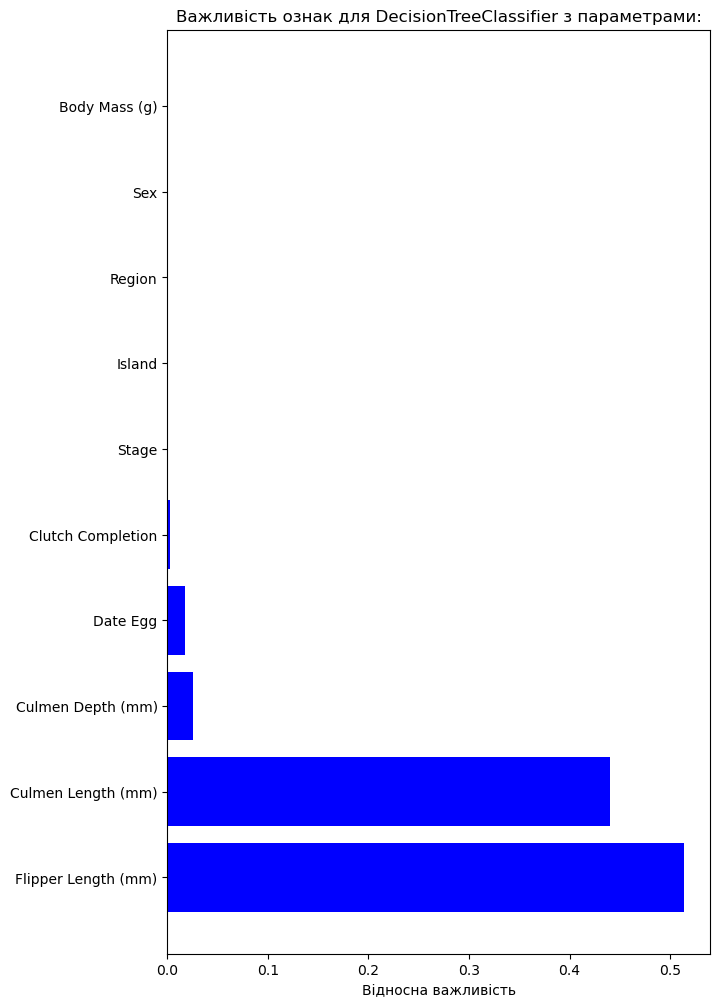

Оцінка ефективності для DecisionTreeClassifier:
Accuracy (точність правильних прогнозів): 0.9166666666666666
Precision (частка позитивних прогнозів): 0.9218559218559218
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.917730301363164
F1 Score (гармонійне середнє між Precision і Recall): 0.9194194654860849
Матриця плутанини (confusion matrix) для DecisionTreeClassifier:
[[74  8  0]
 [ 7 69  0]
 [ 3  1 66]]


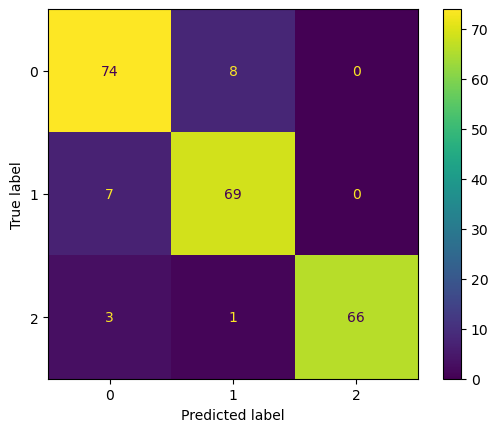

In [23]:
# Дерево рішень (DecisionTreeClassifier) з параметрами
# Параметри:
    # Максимальна глибина дерева
    # Мінімальна кількість зразків для розподілу вузла
    # Мінімальна кількість зразків у листі
    # Вибір алгоритму автоматичний
    # Критерій для розподілу
    # Випадковий стан (початкове значення для рандому)
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10,  min_samples_leaf=5, criterion='gini', random_state=42)
dt_classifier.fit(X_train, y_train.values.ravel())  # Тренуємо модель на навчальних даних
y_pred = dt_classifier.predict(X_test)  # Прогнозуємо результати на тестових даних
print("Дерево рішень (DecisionTreeClassifier) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(dt_classifier, X_train, X_columns, 'DecisionTreeClassifier з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'DecisionTreeClassifier')

Випадковий ліс (RandomForestClassifier) з параметрами:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.95      1.00      0.97        76
           2       1.00      1.00      1.00        70

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

Рейтинг ознак для RandomForestClassifier з параметрами:
1. Culmen Length (mm) (0.267861)
2. Flipper Length (mm) (0.236161)
3. Culmen Depth (mm) (0.137015)
4. Date Egg (0.132897)
5. Body Mass (g) (0.116755)
6. Island (0.103728)
7. Sex (0.003254)
8. Clutch Completion (0.002329)
9. Stage (0.000000)
10. Region (0.000000)


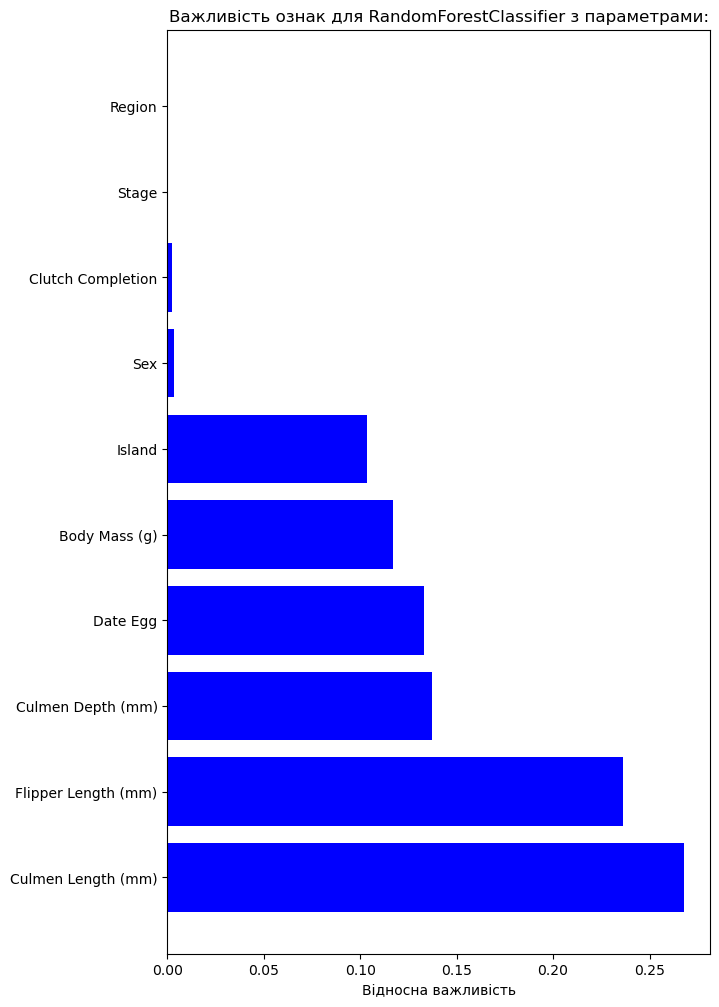

Оцінка ефективності для RandomForestClassifier:
Accuracy (точність правильних прогнозів): 0.9824561403508771
Precision (частка позитивних прогнозів): 0.9833333333333334
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.983739837398374
F1 Score (гармонійне середнє між Precision і Recall): 0.9831196581196581
Матриця плутанини (confusion matrix) для RandomForestClassifier:
[[78  4  0]
 [ 0 76  0]
 [ 0  0 70]]


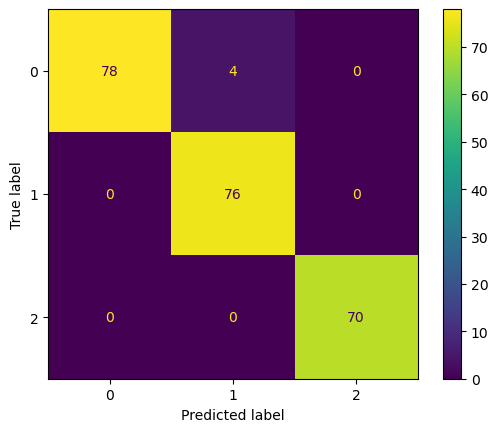

In [24]:
# Випадковий ліс (RandomForestClassifier) з параметрами
    # Кількість дерев
    # Критерій для розподілу
    # Максимальна глибина дерева
    # Мінімальна кількість зразків для розподілу вузла
    # Мінімальна кількість зразків у листі
    # Випадковий стан (початкове значення для рандому)
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_classifier.fit(X_train, y_train.values.ravel())
y_pred = rf_classifier.predict(X_test)
print("Випадковий ліс (RandomForestClassifier) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(rf_classifier, X_train, X_columns, 'RandomForestClassifier з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'RandomForestClassifier')

Градієнтний спуск (GradientBoostingClassifier) з параметрами:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        82
           1       0.94      1.00      0.97        76
           2       1.00      1.00      1.00        70

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

Рейтинг ознак для GradientBoostingClassifier з параметрами:
1. Culmen Length (mm) (0.431773)
2. Flipper Length (mm) (0.339924)
3. Island (0.132667)
4. Culmen Depth (mm) (0.065910)
5. Date Egg (0.028232)
6. Body Mass (g) (0.001464)
7. Sex (0.000025)
8. Clutch Completion (0.000005)
9. Stage (0.000000)
10. Region (0.000000)


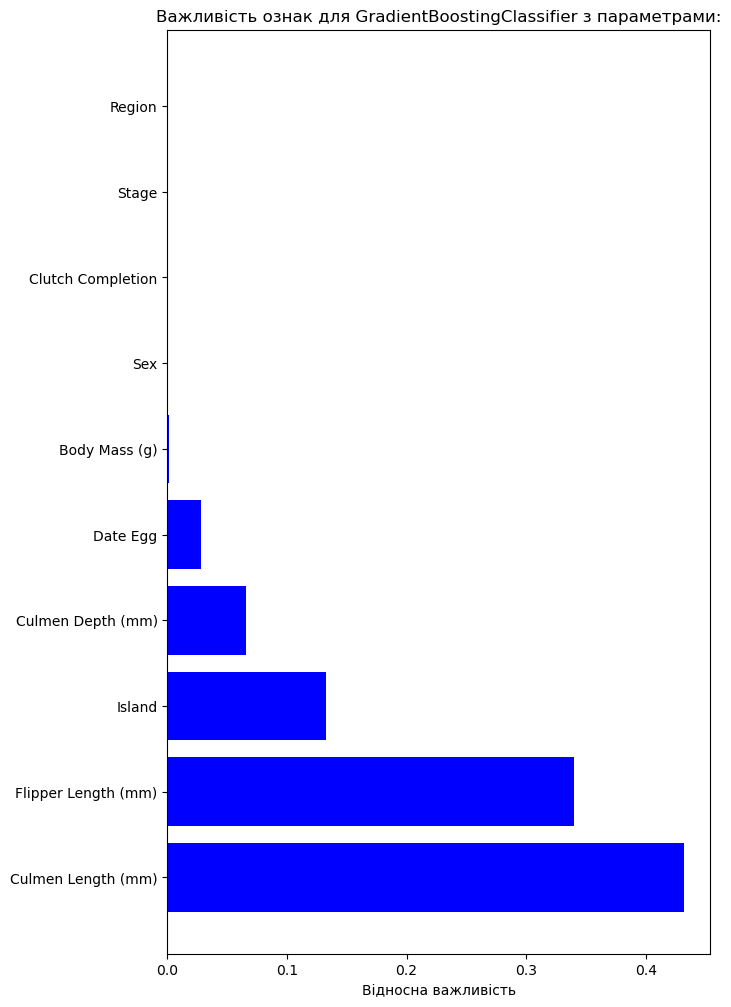

Оцінка ефективності для GradientBoostingClassifier:
Accuracy (точність правильних прогнозів): 0.9780701754385965
Precision (частка позитивних прогнозів): 0.9794238683127571
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.9796747967479674
F1 Score (гармонійне середнє між Precision і Recall): 0.9789021084538451
Матриця плутанини (confusion matrix) для GradientBoostingClassifier:
[[77  5  0]
 [ 0 76  0]
 [ 0  0 70]]


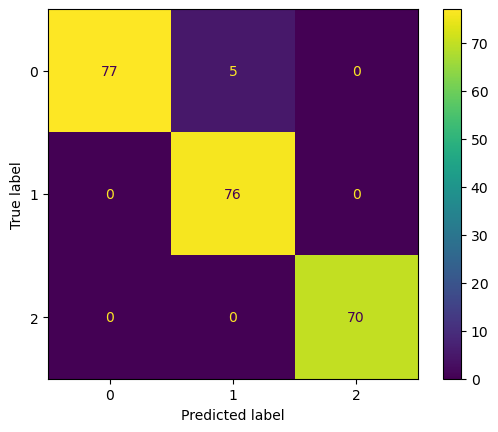

In [25]:
# Градієнтний спуск (GradientBoostingClassifier) з параметрами
    # Кількість дерев
    # Швидкість навчання
    # Максимальна глибина дерева
    # Випадковий стан (початкове значення для рандому)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train.values.ravel())
y_pred = gb_classifier.predict(X_test)
print("Градієнтний спуск (GradientBoostingClassifier) з параметрами:\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(gb_classifier, X_train, X_columns, 'GradientBoostingClassifier з параметрами')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'GradientBoostingClassifier')

## Висновки
- Для виконання цієї ПР, я використовував дані, які підготував у ПР № 2. Спочатку я закодував категоріальні (текстові) стовпці.
- Потім я визначив цільову змінну (вид пінгвіна) і категоріальні ознаки (усі інші стовпці).
- Далі я визначив тренувальні і тестові набори.
- Я розробив дві функції оцінки "важливості ознак з виводом графіку" та "виводу матриці плутанини і оцінка ефективності моделей".
- Я використовував такі методи: Градієнтний спуск (GradientBoostingClassifier), Випадковий ліс (RandomForestClassifier), Дерево рішень (DecisionTreeClassifier), Найближчі сусіди (KNeighborsClassifier), Стохастичний градієнт (SGDClassifier), Метод опорних векторів (SVC), Баєсова класифікація (GaussianNB), Логістична регресія (LogisticRegression). Я зробив 2 випадки використання - з параметрами за замовчуванням і заданими.
- Найбільш ефективні методи: Градієнтний спуск (GradientBoostingClassifier), Випадковий ліс (RandomForestClassifier), Логістична регресія (LogisticRegression).
- Я використовував такі параметри для оцінки ефективності: матриця плутанини (confusion matrix), Accuracy (точність правильних прогнозів), Precision (частка позитивних прогнозів), Recall (частка позитивних прогнозів, що були правильно виявлені), F1 Score (гармонійне середнє між Precision і Recall). Тому що це найбільш використовувані та ефективні методи для оцінювання.
- У більшості моделей важливість ознак були: Culmen Deep, Culmen Length, Flipper Length. Це пов'язано з тим, що у більшості пінгвінів цей параметр відрізняється залежно від виду і це є важливі фактори для правильної класифікації пінгвінів.